In [43]:
# ===================================================
# 🚩 Dataset Simulado — Detecção de Fraudes Bancárias
# ===================================================

# ========================
# 🔧 Importação de Bibliotecas
# ========================
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

# ========================
# ⚙️ Definição dos Parâmetros
# ========================
N_REGISTROS = 50000
PERCENTUAL_FRAUDE = 0.01  # 1%
N_FRAUDE = int(N_REGISTROS * PERCENTUAL_FRAUDE)
N_LEGITIMO = N_REGISTROS - N_FRAUDE

# ========================
# 🔨 Funções Geradoras
# ========================
def gerar_idade(n):
    return np.random.randint(18, 70, n)

def gerar_renda(n):
    return np.random.normal(5000, 2000, n).clip(1000, 20000)

def gerar_limite_credito(renda):
    return renda * np.random.uniform(1.5, 3.5, len(renda))

def gerar_valor_transacao(n):
    return np.random.exponential(500, n).clip(10, 5000)

def gerar_horario_transacao(n):
    return np.random.randint(0, 24, n)

def gerar_tipo_estabelecimento(n):
    return np.random.choice(
        ['Supermercado', 'Farmácia', 'Eletrônicos', 'Posto de Combustível', 'Roupas', 'E-commerce'], n
    )

def gerar_dispositivo(n):
    return np.random.choice(
        ['App Mobile', 'Web', 'POS Físico'], n
    )

def gerar_distancia_residencia(n):
    return np.random.exponential(10, n).clip(0, 100)

def gerar_tempo_cliente(n):
    return np.random.randint(0, 120, n)  # em meses

def gerar_score_credito(n):
    return np.random.randint(300, 900, n)

def gerar_historico_atrasos(n):
    return np.random.poisson(1, n)

def gerar_primeira_compra(n):
    return np.random.choice(['Sim', 'Não'], n, p=[0.2, 0.8])

# ========================
# ✅ Dados Legítimos
# ========================
dados_legitimos = pd.DataFrame({
    'idade': gerar_idade(N_LEGITIMO),
    'renda': gerar_renda(N_LEGITIMO).round(2),
    'limite_credito': gerar_limite_credito(gerar_renda(N_LEGITIMO)).round(2),
    'valor_transacao': gerar_valor_transacao(N_LEGITIMO).round(2),
    'horario_transacao': gerar_horario_transacao(N_LEGITIMO),
    'tipo_estabelecimento': gerar_tipo_estabelecimento(N_LEGITIMO),
    'dispositivo': gerar_dispositivo(N_LEGITIMO),
    'distancia_residencia_km': gerar_distancia_residencia(N_LEGITIMO).round(2),
    'tempo_cliente_meses': gerar_tempo_cliente(N_LEGITIMO),
    'score_credito': gerar_score_credito(N_LEGITIMO),
    'historico_atrasos': gerar_historico_atrasos(N_LEGITIMO),
    'primeira_compra_estabelecimento': gerar_primeira_compra(N_LEGITIMO),
    'status_fraude': 'Não'
})

# ========================
# 🚩 Dados Fraudulentos
# ========================
dados_fraude = pd.DataFrame({
    'idade': gerar_idade(N_FRAUDE),
    'renda': (gerar_renda(N_FRAUDE) * np.random.uniform(0.5, 1.0, N_FRAUDE)).round(2),
    'limite_credito': gerar_limite_credito(
        np.random.normal(4000, 1500, N_FRAUDE).clip(500, 15000)
    ).round(2),
    'valor_transacao': (gerar_valor_transacao(N_FRAUDE) * np.random.uniform(2, 5, N_FRAUDE)).clip(10, 20000).round(2),
    'horario_transacao': np.random.choice([0,1,2,3,4,22,23], N_FRAUDE),
    'tipo_estabelecimento': np.random.choice(['E-commerce', 'Eletrônicos'], N_FRAUDE),
    'dispositivo': np.random.choice(['Web', 'App Mobile'], N_FRAUDE),
    'distancia_residencia_km': (gerar_distancia_residencia(N_FRAUDE) + np.random.uniform(50, 200, N_FRAUDE)).round(2),
    'tempo_cliente_meses': (gerar_tempo_cliente(N_FRAUDE) * np.random.uniform(0, 0.5, N_FRAUDE)).astype(int),
    'score_credito': (gerar_score_credito(N_FRAUDE) * np.random.uniform(0.5, 0.8, N_FRAUDE)).astype(int),
    'historico_atrasos': gerar_historico_atrasos(N_FRAUDE) + np.random.poisson(2, N_FRAUDE),
    'primeira_compra_estabelecimento': 'Sim',
    'status_fraude': 'Sim'
})

# ========================
# 🔗 Combinar e Organizar
# ========================
df = pd.concat([dados_legitimos, dados_fraude]).sample(frac=1, random_state=42).reset_index(drop=True)

# ========================
# 📋 Visualização Harmônica
# ========================
pd.set_option('display.float_format', '{:,.2f}'.format)  # formato dos números

print("\n📊 Visualização Amostra do Dataset:\n")
display(df.head(10))

print("\n🔍 Distribuição de Fraude:\n")
print(df['status_fraude'].value_counts())
# ========================




📊 Visualização Amostra do Dataset:



,idade,renda,limite_credito,valor_transacao,horario_transacao,tipo_estabelecimento,dispositivo,distancia_residencia_km,tempo_cliente_meses,score_credito,historico_atrasos,primeira_compra_estabelecimento,status_fraude
0,29,"5,071.97","18,940.35",360.16,22,Roupas,POS Físico,39.08,0,606,0,Não,Não
1,63,"3,198.76","15,033.57",241.26,20,Roupas,POS Físico,4.02,51,590,2,Não,Não
2,47,"2,584.93","14,351.90",203.15,9,Posto de Combustível,Web,2.17,27,301,0,Não,Não
3,19,"2,835.92","10,442.69",449.34,13,Eletrônicos,POS Físico,21.10,80,853,0,Sim,Não
4,65,"1,749.63","11,775.52",312.67,18,E-commerce,POS Físico,28.26,29,780,0,Não,Não
5,26,"9,810.07","10,728.46",510.82,17,E-commerce,POS Físico,7.86,90,784,3,Não,Não
6,68,"3,350.94","8,577.42",994.68,23,Eletrônicos,Web,10.51,90,760,2,Não,Não
7,55,"2,451.07","10,657.75",795.86,1,E-commerce,Web,28.03,35,477,1,Não,Não
8,62,"2,863.44","8,109.87",214.70,23,Eletrônicos,Web,0.22,18,686,2,Sim,Não
9,53,"5,671.85","15,487.66",569.35,15,Posto de Combustível,POS Físico,1.54,19,494,0,Sim,Não



🔍 Distribuição de Fraude:

status_fraude
Não    49500
Sim      500
Name: count, dtype: int64


📑 Dimensão do dataset: (50000, 13)


,idade,renda,limite_credito,valor_transacao,horario_transacao,tipo_estabelecimento,dispositivo,distancia_residencia_km,tempo_cliente_meses,score_credito,historico_atrasos,primeira_compra_estabelecimento,status_fraude
0,69,"7,886.29","7,484.00",585.38,4,E-commerce,POS Físico,15.34,70,601,0,Sim,Não
1,29,"4,644.06","8,632.54",602.05,0,Farmácia,POS Físico,0.24,93,863,1,Não,Não
2,65,"6,578.91","7,930.01",210.59,19,Supermercado,App Mobile,7.28,64,725,0,Não,Não
3,47,"3,762.00","5,083.14",169.15,11,Farmácia,App Mobile,9.75,107,674,0,Sim,Não
4,31,"5,950.61","8,035.04",165.13,10,E-commerce,Web,15.74,81,556,1,Não,Não



🔧 Informações dos Dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   idade                            50000 non-null  int32  
 1   renda                            50000 non-null  float64
 2   limite_credito                   50000 non-null  float64
 3   valor_transacao                  50000 non-null  float64
 4   horario_transacao                50000 non-null  int32  
 5   tipo_estabelecimento             50000 non-null  object 
 6   dispositivo                      50000 non-null  object 
 7   distancia_residencia_km          50000 non-null  float64
 8   tempo_cliente_meses              50000 non-null  int32  
 9   score_credito                    50000 non-null  int32  
 10  historico_atrasos                50000 non-null  int32  
 11  primeira_compra_estabelecimento  50000 non-null  objec

None


📊 Estatísticas Descritivas:


,idade,renda,limite_credito,valor_transacao,horario_transacao,distancia_residencia_km,tempo_cliente_meses,score_credito,historico_atrasos
count,"50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00"
mean,43.54,"4,997.35","12,523.14",509.52,11.50,11.18,59.15,596.27,1.02
std,15.02,"1,960.25","5,762.92",544.48,6.96,16.26,34.68,174.44,1.04
min,18.00,550.58,824.00,10.00,0.00,0.00,0.00,162.00,0.00
25%,31.00,"3,633.13","8,325.12",144.31,5.00,2.88,29.00,445.00,0.00
50%,44.00,"4,973.47","11,920.79",348.53,11.00,7.03,59.00,596.00,1.00
75%,57.00,"6,340.39","16,107.67",697.43,18.00,14.19,89.00,748.00,2.00
max,69.00,"13,375.19","41,372.95","13,461.47",23.00,236.38,119.00,899.00,11.00



🎯 Distribuição da Variável Alvo (Fraude):
status_fraude
Não   99.00
Sim    1.00
Name: proportion, dtype: float64


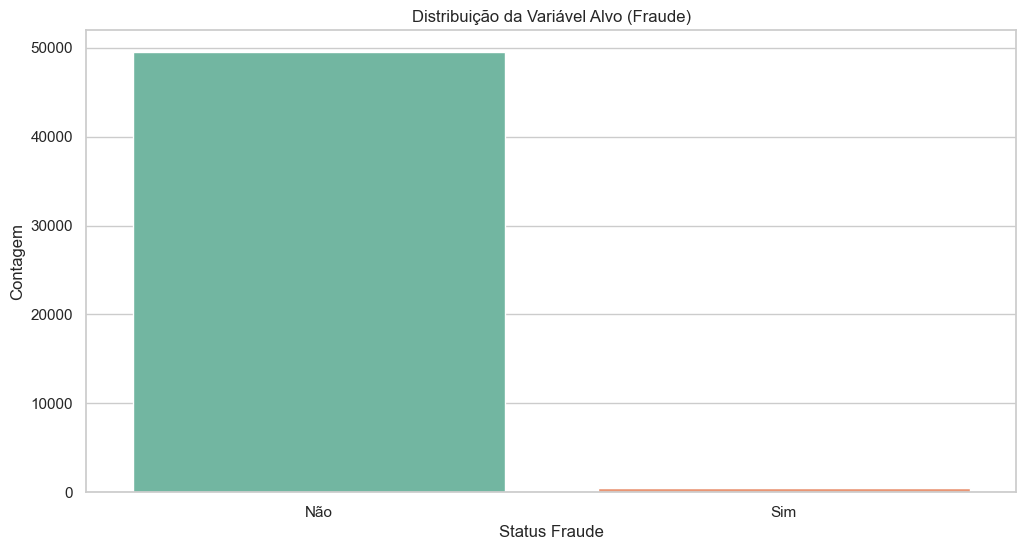

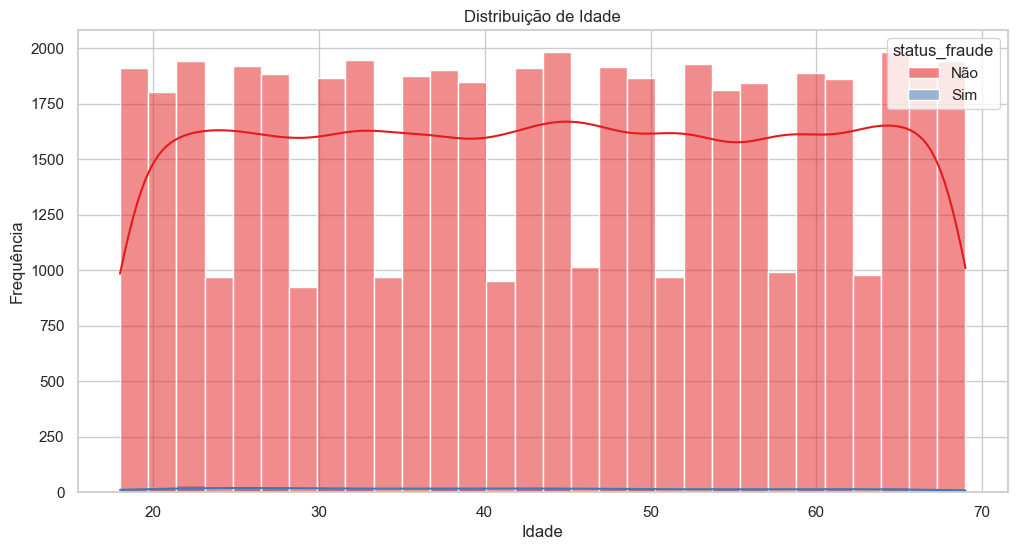

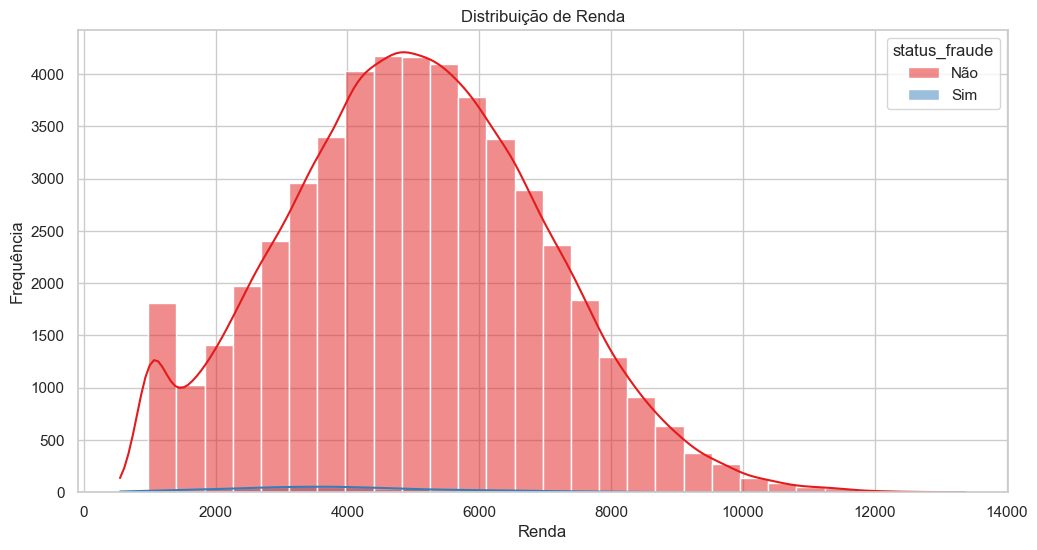

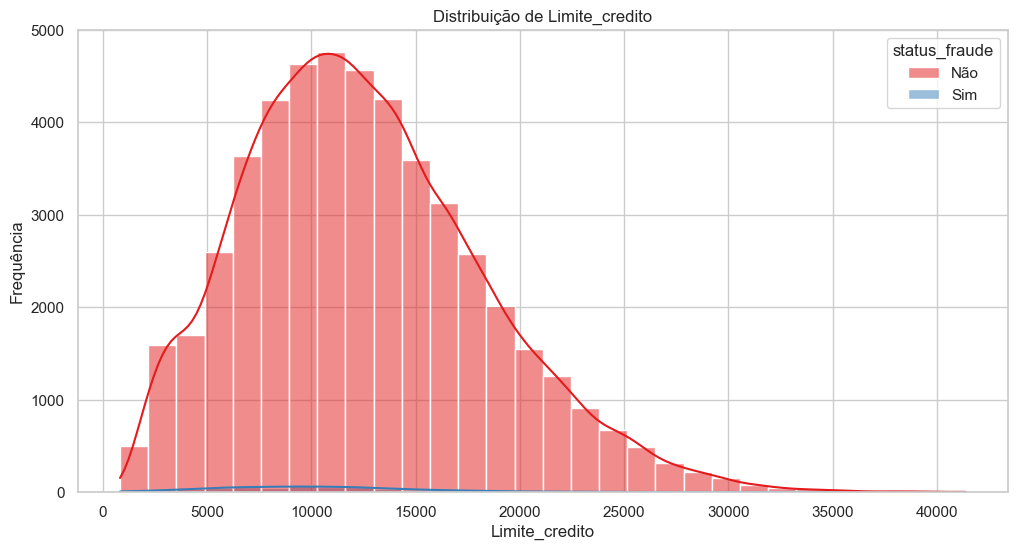

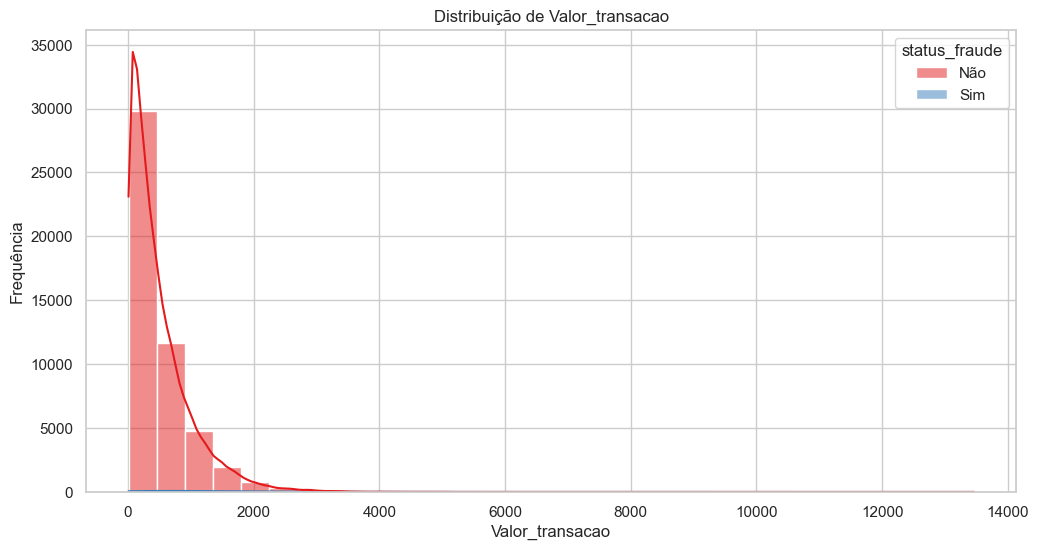

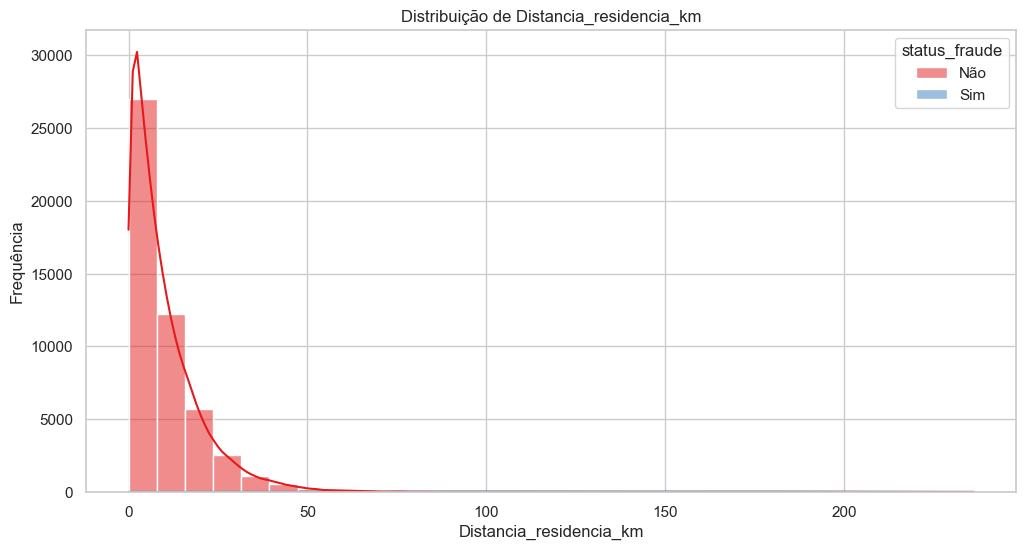

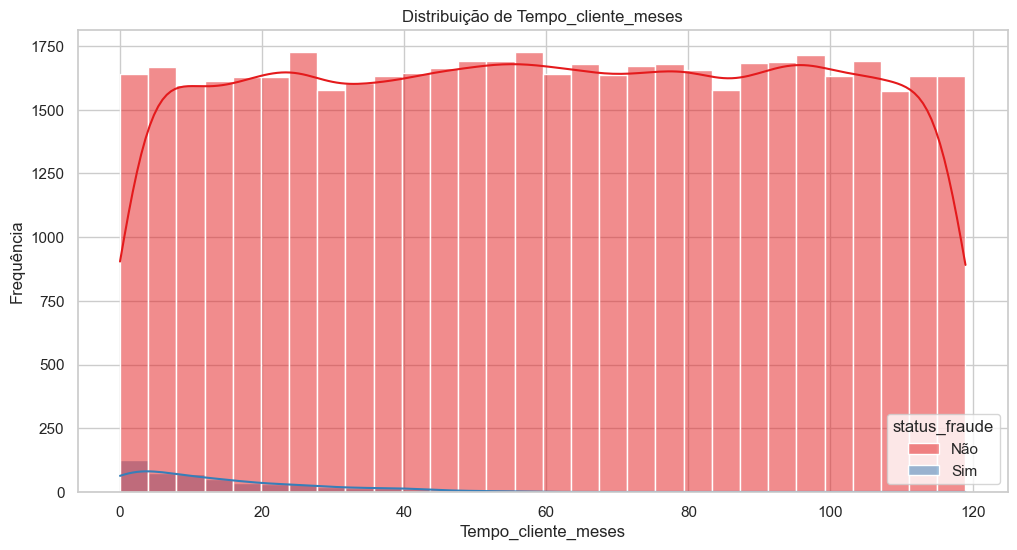

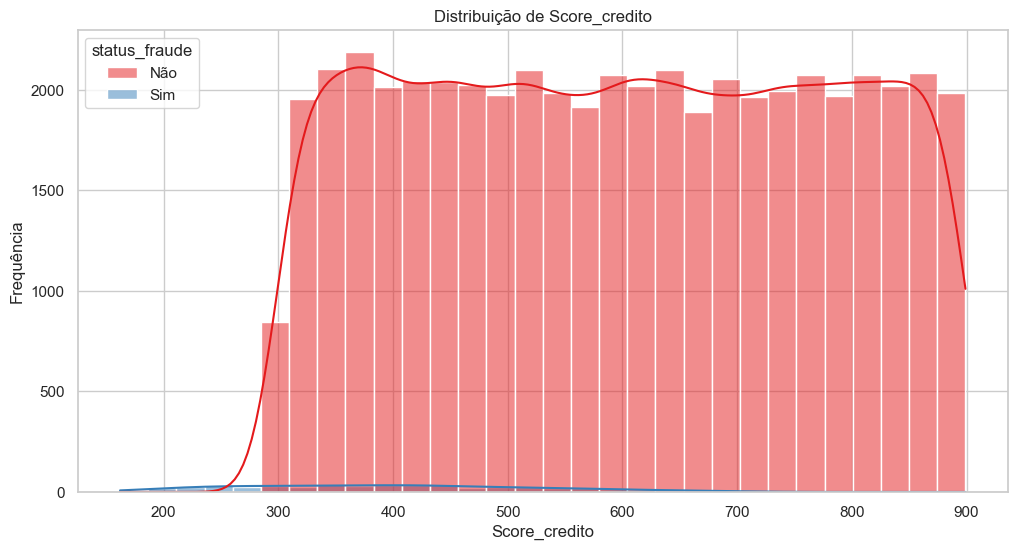

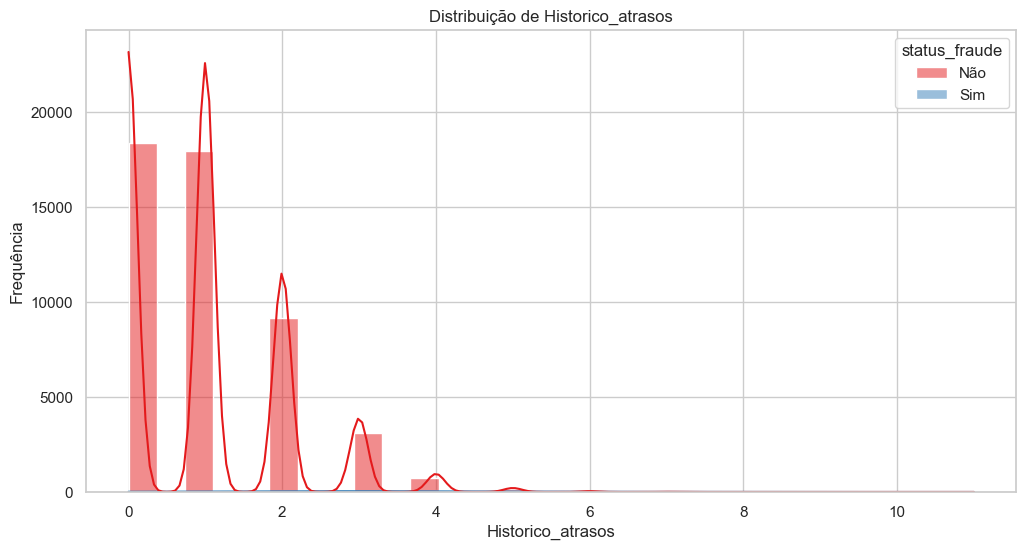

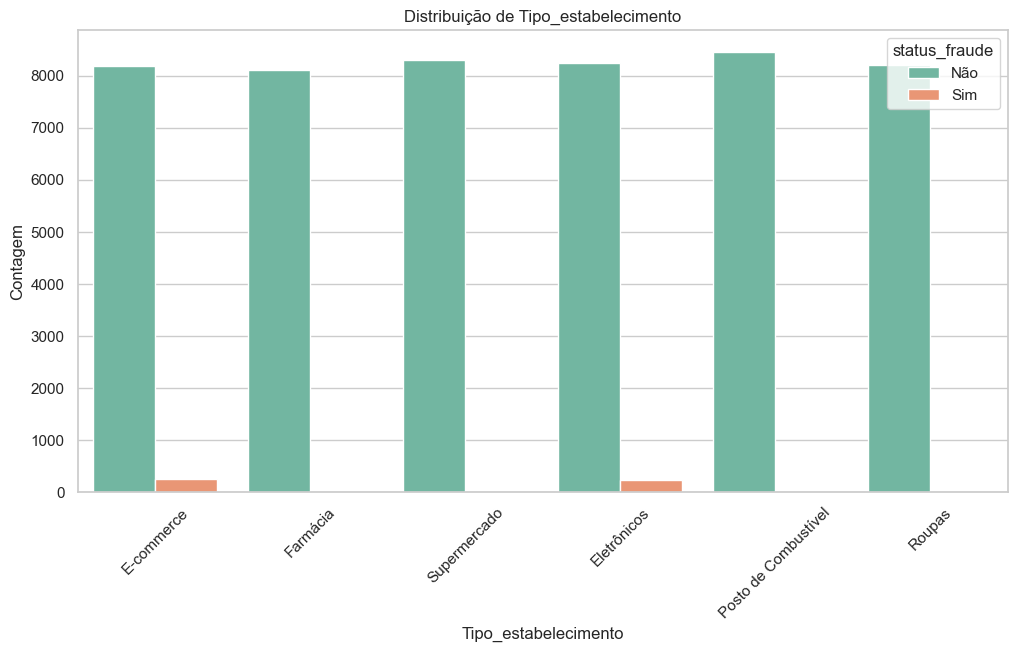

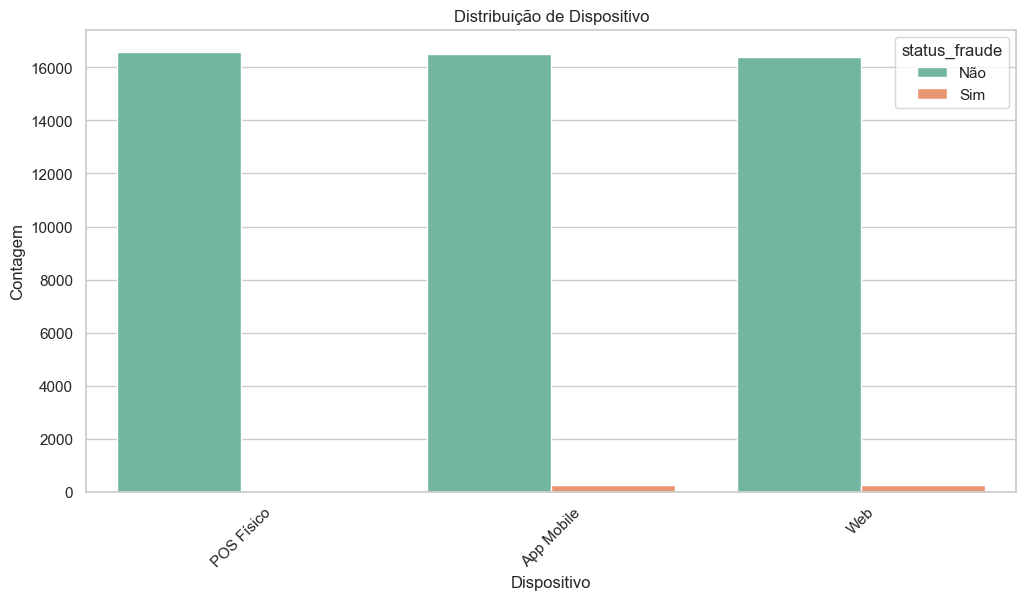

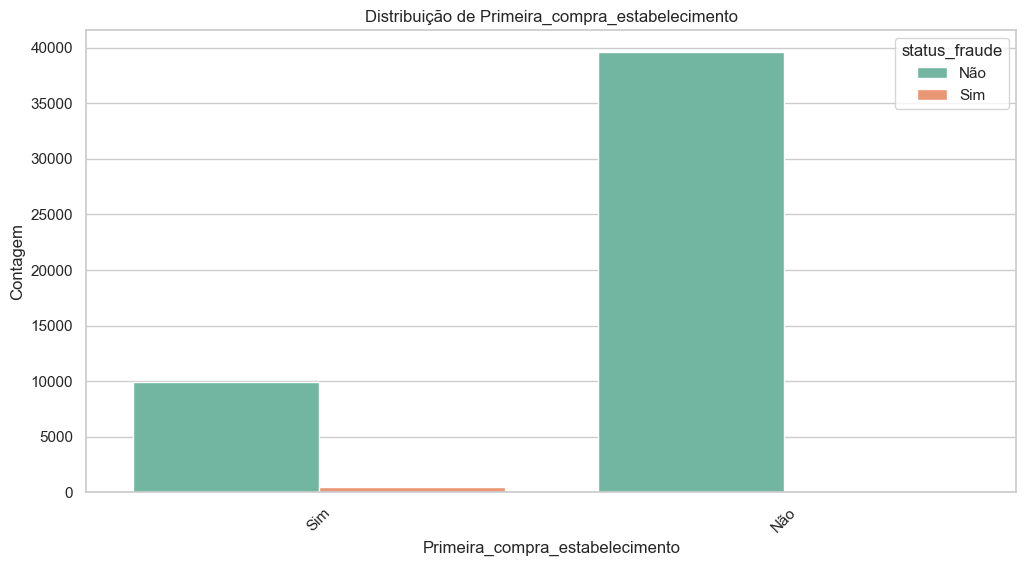

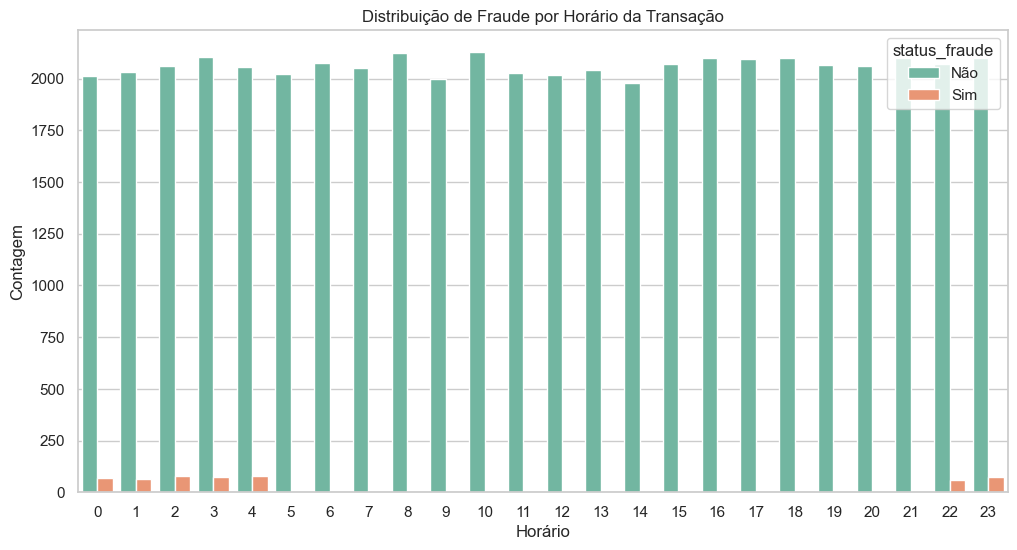

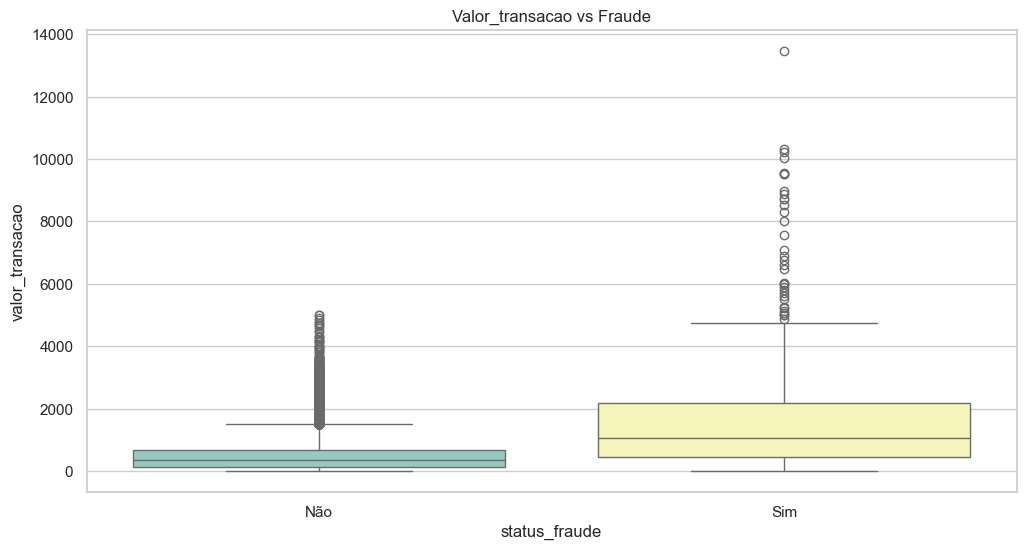

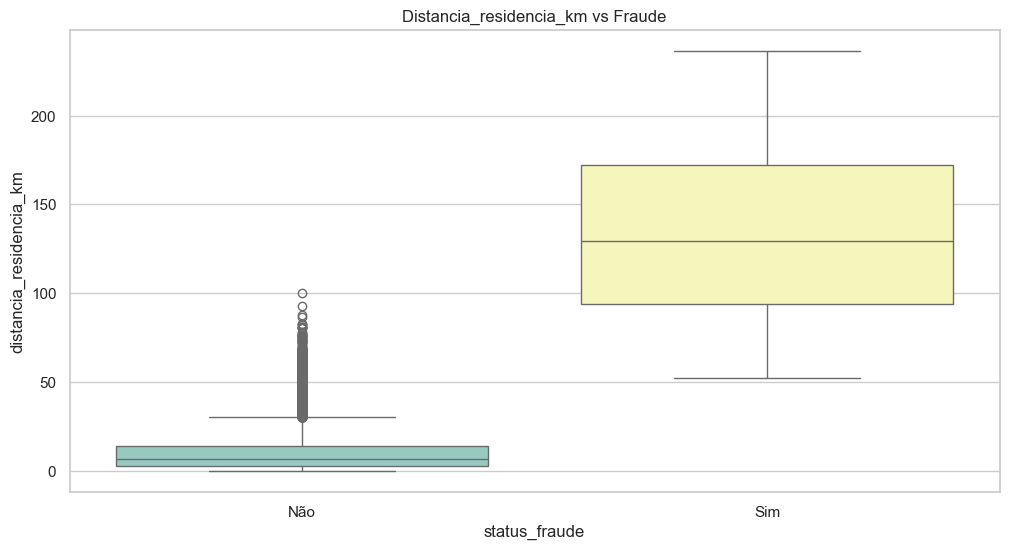

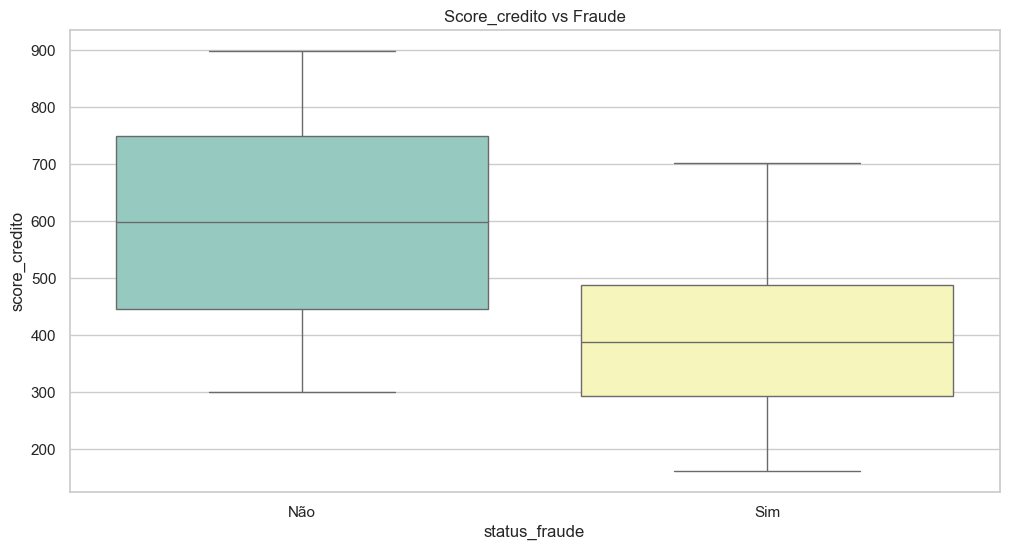

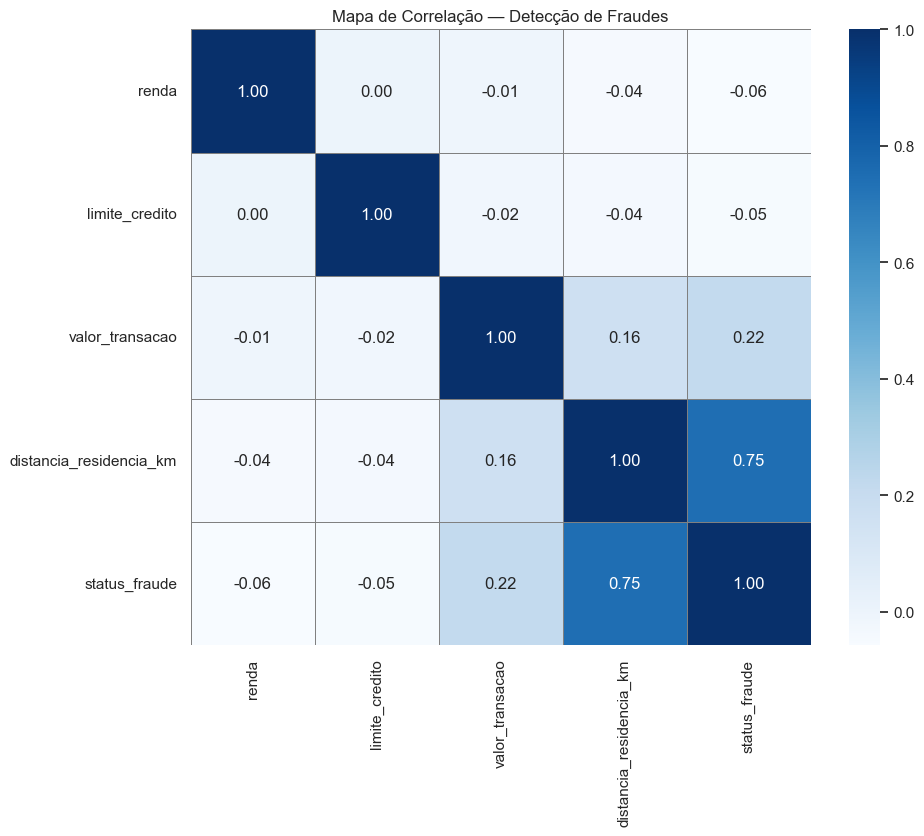


🚨 Principais Sinais de Fraude Detectados:

1. 🔥 Alta concentração de fraudes entre 0h e 5h.
2. 🏪 Fraudes ocorrem mais em setores de 'E-commerce' e 'Eletrônicos'.
3. 💰 Transações fraudulentas têm valores medianos mais altos.
4. 🚩 Distâncias maiores entre a residência do cliente e o local da transação.
5. ⏰ Maior incidência de fraude na primeira compra de um estabelecimento.
6. 📉 Clientes com menor score de crédito, tempo de relacionamento menor e mais atrasos estão mais expostos.



In [39]:


# =========================================================
# 🔍 Visão Geral dos Dados
# =========================================================
print('📑 Dimensão do dataset:', df.shape)
display(df.head())

print('\n🔧 Informações dos Dados:')
display(df.info())

print('\n📊 Estatísticas Descritivas:')
display(df.describe())

# ✅ Distribuição da variável alvo
print('\n🎯 Distribuição da Variável Alvo (Fraude):')
print(df['status_fraude'].value_counts(normalize=True) * 100)

sns.countplot(data=df, x='status_fraude', hue='status_fraude', palette='Set2', legend=False)
plt.title('Distribuição da Variável Alvo (Fraude)')
plt.ylabel('Contagem')
plt.xlabel('Status Fraude')
plt.show()

# =========================================================
# 🔎 Análise Univariada
# =========================================================

## 🔢 Variáveis Numéricas
num_cols = ['idade', 'renda', 'limite_credito', 'valor_transacao',
             'distancia_residencia_km', 'tempo_cliente_meses',
             'score_credito', 'historico_atrasos']

for col in num_cols:
    plt.figure()
    sns.histplot(data=df, x=col, hue='status_fraude', kde=True, bins=30, palette='Set1')
    plt.title(f'Distribuição de {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequência')
    plt.show()

## 🏷️ Variáveis Categóricas
cat_cols = ['tipo_estabelecimento', 'dispositivo', 'primeira_compra_estabelecimento']

for col in cat_cols:
    plt.figure()
    sns.countplot(data=df, x=col, hue='status_fraude', palette='Set2')
    plt.title(f'Distribuição de {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.show()

# =========================================================
# 🔗 Análise Bivariada
# =========================================================

## ⏰ Fraude por Horário da Transação
plt.figure()
sns.countplot(data=df, x='horario_transacao', hue='status_fraude', palette='Set2')
plt.title('Distribuição de Fraude por Horário da Transação')
plt.xlabel('Horário')
plt.ylabel('Contagem')
plt.show()

## 🎯 Boxplots para comparação de variáveis
for col in ['valor_transacao', 'distancia_residencia_km', 'score_credito']:
    plt.figure()
    sns.boxplot(data=df, x='status_fraude', y=col, hue='status_fraude', palette='Set3', dodge=False)
    plt.title(f'{col.capitalize()} vs Fraude')
    plt.show()

# =========================================================
# 🔥 Análise Multivariada - Correlação
# =========================================================

# Convertendo variável alvo para numérico
df_corr = df.copy()
df_corr['status_fraude'] = df_corr['status_fraude'].map({'Não': 0, 'Sim': 1})

# Selecionando apenas variáveis numéricas
numericas = df_corr.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numericas.corr(), annot=True, fmt=".2f", cmap='Blues', linewidths=0.5, linecolor='gray')
plt.title('Mapa de Correlação — Detecção de Fraudes')
plt.show()

# =========================================================
# 💡 Principais Insights de Negócio
# =========================================================

print("""
🚨 Principais Sinais de Fraude Detectados:

1. 🔥 Alta concentração de fraudes entre 0h e 5h.
2. 🏪 Fraudes ocorrem mais em setores de 'E-commerce' e 'Eletrônicos'.
3. 💰 Transações fraudulentas têm valores medianos mais altos.
4. 🚩 Distâncias maiores entre a residência do cliente e o local da transação.
5. ⏰ Maior incidência de fraude na primeira compra de um estabelecimento.
6. 📉 Clientes com menor score de crédito, tempo de relacionamento menor e mais atrasos estão mais expostos.
""")





📊 Colunas do dataset:
Index(['idade', 'renda', 'limite_credito', 'valor_transacao',
       'horario_transacao', 'tipo_estabelecimento', 'dispositivo',
       'distancia_residencia_km', 'tempo_cliente_meses', 'score_credito',
       'historico_atrasos', 'primeira_compra_estabelecimento',
       'status_fraude'],
      dtype='object')

📦 Colunas categóricas: ['tipo_estabelecimento', 'dispositivo', 'primeira_compra_estabelecimento']
✅ Encoding aplicado nas colunas: ['tipo_estabelecimento', 'dispositivo', 'primeira_compra_estabelecimento']

🔎 Distribuição target treino: status_fraude
0    34650
1      350
Name: count, dtype: int64
🔎 Distribuição target teste: status_fraude
0    14850
1      150
Name: count, dtype: int64

✅ Após SMOTE - target balanceado:
status_fraude
0    34650
1    34650
Name: count, dtype: int64

📊 Avaliação do Modelo: Random Forest
Confusion Matrix:
[[14850     0]
 [    0   150]]

Classification Report:
              precision    recall  f1-score   support

          

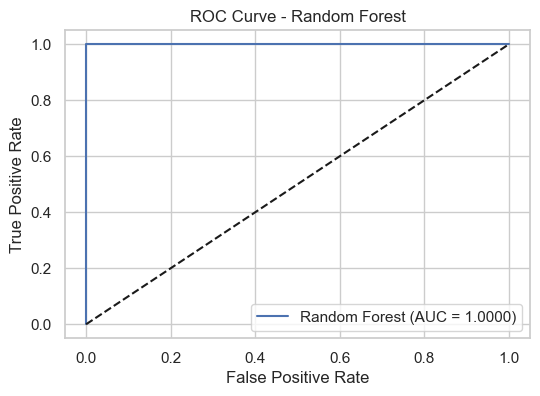


📊 Avaliação do Modelo: XGBoost
Confusion Matrix:
[[14850     0]
 [    2   148]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14850
           1       1.00      0.99      0.99       150

    accuracy                           1.00     15000
   macro avg       1.00      0.99      1.00     15000
weighted avg       1.00      1.00      1.00     15000

AUC: 1.0000
Accuracy: 0.9999
Precision: 1.0000
Recall: 0.9867
F1-Score: 0.9933


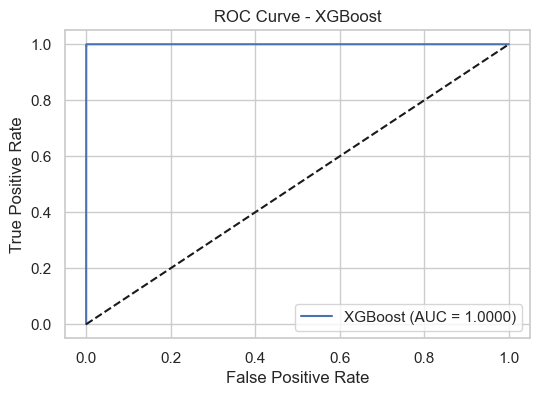

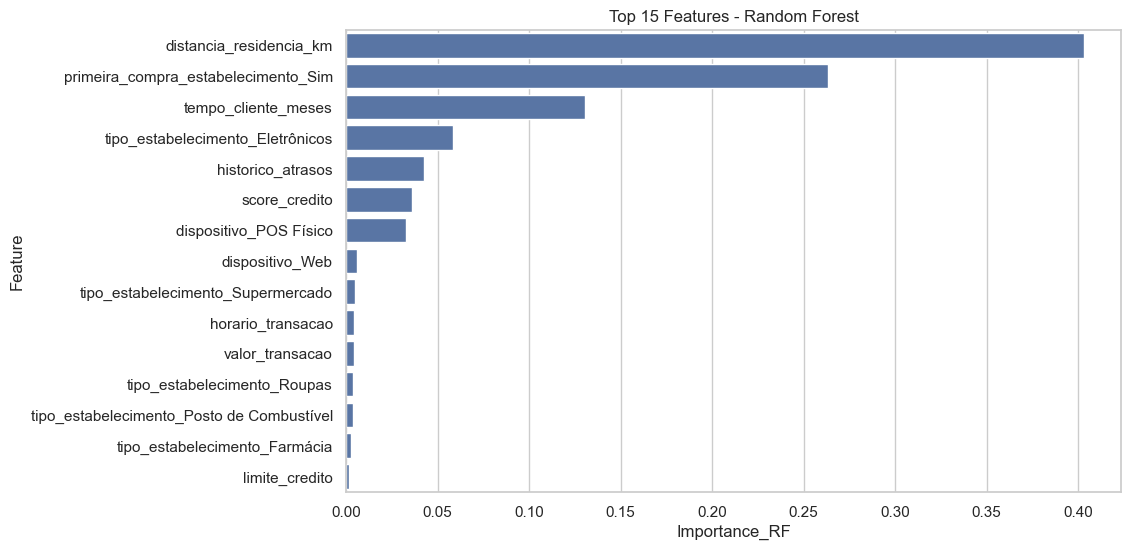

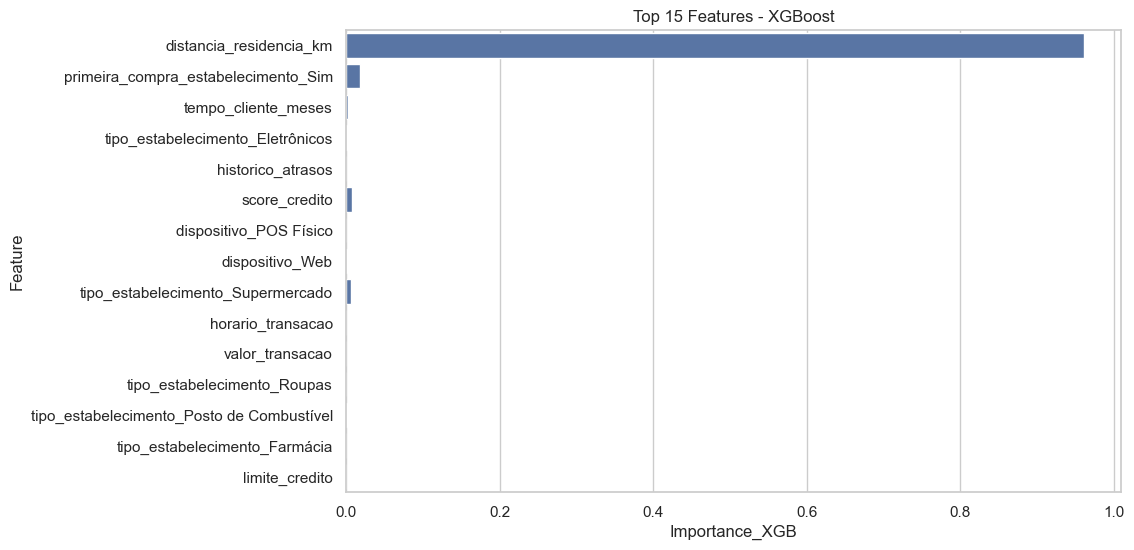

In [41]:
# 🚀 Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (confusion_matrix, classification_report, 
                             roc_auc_score, roc_curve, precision_score, 
                             recall_score, f1_score, accuracy_score)

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')


# 🚀 2. Analisar colunas
print('\n📊 Colunas do dataset:')
print(df.columns)

# ✅ Corrigir nome das colunas se necessário
# Exemplo:
# df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# 🚀 3. Engenharia de Features
# 🔥 Encoding da variável alvo
df['status_fraude'] = df['status_fraude'].map({'Não': 0, 'Sim': 1})

# 🔥 Identificar colunas categóricas
categ_cols = df.select_dtypes(include='object').columns.tolist()
print('\n📦 Colunas categóricas:', categ_cols)

# 🔥 Encoding das categóricas (se existirem)
if categ_cols:
    df = pd.get_dummies(df, columns=categ_cols, drop_first=True)
    print('✅ Encoding aplicado nas colunas:', categ_cols)
else:
    print('⚠️ Nenhuma coluna categórica encontrada para encoding.')

# 🚀 4. Separar variáveis
X = df.drop('status_fraude', axis=1)
y = df['status_fraude']

# 🚀 5. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f'\n🔎 Distribuição target treino: {y_train.value_counts()}')
print(f'🔎 Distribuição target teste: {y_test.value_counts()}')

# 🚀 6. Balanceamento com SMOTE (Super importante em fraude!)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f'\n✅ Após SMOTE - target balanceado:\n{y_train_res.value_counts()}')

# 🚀 7. Modelagem - Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# 🚀 8. Modelagem - XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# 🚀 9. Função de Avaliação
def avaliar_modelo(y_true, y_pred, y_proba, nome_modelo):
    print(f'\n📊 Avaliação do Modelo: {nome_modelo}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_true, y_pred))
    print('\nClassification Report:')
    print(classification_report(y_true, y_pred))
    
    auc = roc_auc_score(y_true, y_proba)
    print(f'AUC: {auc:.4f}')
    print(f'Accuracy: {accuracy_score(y_true, y_pred):.4f}')
    print(f'Precision: {precision_score(y_true, y_pred):.4f}')
    print(f'Recall: {recall_score(y_true, y_pred):.4f}')
    print(f'F1-Score: {f1_score(y_true, y_pred):.4f}')
    
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{nome_modelo} (AUC = {auc:.4f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {nome_modelo}')
    plt.legend(loc='lower right')
    plt.show()

# 🚀 10. Avaliar Modelos
avaliar_modelo(y_test, y_pred_rf, y_proba_rf, 'Random Forest')
avaliar_modelo(y_test, y_pred_xgb, y_proba_xgb, 'XGBoost')

# 🚀 11. 🔥 Comparar Importância das Features
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance_RF': rf.feature_importances_,
    'Importance_XGB': xgb.feature_importances_
})

importances = importances.sort_values(by='Importance_RF', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance_RF', y='Feature', data=importances.head(15))
plt.title('Top 15 Features - Random Forest')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance_XGB', y='Feature', data=importances.head(15))
plt.title('Top 15 Features - XGBoost')
plt.show()
